# Сборный проект 1 

## Описание проекта

Мы имеем данные, полученные от магазина «Стримчик», который продаёт по всему миру компьютерные игры. 
Доступны исторические данные(1980 - 2016) о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).

Задачи:
* выявить определяющие успешность игры закономерности, что позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании
* отработать принцип работы с данными, неважно, нужно ли спрогнозировать продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## Описание данных

Name — название игры


Platform — платформа


Year_of_Release — год выпуска


Genre — жанр игры


NA_sales — продажи в Северной Америке (миллионы проданных копий)


EU_sales — продажи в Европе (миллионы проданных копий)


JP_sales — продажи в Японии (миллионы проданных копий)


Other_sales — продажи в других странах (миллионы проданных копий)


Critic_Score — оценка критиков (максимум 100)


User_Score — оценка пользователей (максимум 10)


Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.


Данные за 2016 год могут быть неполными.

## Шаг 1. Общая информация о данных

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import statistics

In [2]:
# Открываем датасет, расположенный в jupyter hub.
games = pd.read_csv('/datasets/games.csv')

In [3]:
# Посмотрим первые 10 строк таблицы
games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
# Основная информация о таблице
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Исходя из полученных данных выше видно, что больше всего пропущенных значений имеют столбцы Critic_Score, Rating и User_Score.
Посмотрим на них в процентном соотношении.

In [5]:
(games.isnull().sum().sort_values(ascending=False) / len(games)).apply(lambda x:'{:.2%}'.format(x))

Critic_Score       51.32%
Rating             40.48%
User_Score         40.09%
Year_of_Release     1.61%
Genre               0.01%
Name                0.01%
Other_sales         0.00%
JP_sales            0.00%
EU_sales            0.00%
NA_sales            0.00%
Platform            0.00%
dtype: object

In [6]:
# Посмотрим на описание количественных признаков
games.describe(exclude=['object'])

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [7]:
# Расмотрим описание категориальных признаков
games.describe(include=['object'])

,Name,Platform,Genre,User_Score,Rating
count,16713,16715,16713,10014,9949
unique,11559,31,12,96,8
top,Need for Speed: Most Wanted,PS2,Action,tbd,E
freq,12,2161,3369,2424,3990


### Вывод

Датасет имеет 11 признаков и 16715 примеров.


Мы имеем данные о продажах с 1980 года по 2016. Более 75% данных информируют нас о продажах до 2010 года. Самая большая частота появления в таблице у игры Need for Speed: Most Wanted - 12, у платформы PS2 - 2161 и у жанра Action - 3369.
Всего жанров в таблице 12, 31 платформа и 11559 игр. Возможно после приведения к нижнему регистру и устранения дубликатов эта информация изменится.

Выявленные проблемы:
* Пропущенные значения имеют столбцы Name, Year_of_Release, Genre, Critic_Score, User_Score, Rating. 
* Critic_Score и User_Score имеют больше 40% пропусков, Critic_Score - больше 50%.
* User_Score - количественный признак, а сейчас имеет тип object,
* Year_of_Release  имеет тип float, нам нужен тип int.
* Названия столбцов и все значения в таблице имеют разный регистр, лучше всё привести к нижнему регистру и проверить на наличие дубликатов.

## Шаг 2. Подготовка данных.

Приведем столбцы и категориальные значения столбцов к нижнему регистру.

In [8]:
games.columns = games.columns.str.lower()

In [9]:
for column in ['name', 'platform', 'genre', 'rating']:
    games[column] = games[column].str.lower()

In [10]:
games.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,e
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,e
3,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8,e
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,tetris,gb,1989.0,puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,new super mario bros.,ds,2006.0,platform,11.28,9.14,6.50,2.88,89.0,8.5,e
7,wii play,wii,2006.0,misc,13.96,9.18,2.93,2.84,58.0,6.6,e
8,new super mario bros. wii,wii,2009.0,platform,14.44,6.94,4.70,2.24,87.0,8.4,e
9,duck hunt,nes,1984.0,shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [11]:
# Проверим наличие дубликатов
games.duplicated().sum() 

0

### Обработка пропусков

#### Жанр и Название

In [12]:
# Посмотрим на строки с пропущенным названием игры
games[games.name.isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,gen,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,gen,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [13]:
# Посмотрим на строки с пропущенным жанром
games[games.genre.isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,gen,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,gen,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Они сопадают и их всего 2. Продаж почти нет, score и rating тоже не известны. Удалим их.

In [14]:
games = games[~games.genre.isnull()]

#### Оценка пользователями

In [15]:
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Заметим, что есть значения nan и tbd

tbd -To Be Determined. Аббревиатура, используемая для поля, которое еще не определено, но будет определено в будущем.

In [16]:
games[games['user_score'] == 'tbd']['user_score'].count()

2424

Преобразуем tbd в nan

In [17]:
games['user_score'].replace({"tbd": np.nan}, inplace=True)

In [18]:
print('Число пропусков в столбце user_score =', games[games.user_score.isnull()].shape[0])

Число пропусков в столбце user_score = 9123


#### Оценка критиками

In [19]:
print('Число пропусков в столбце critic_score =', games[games.critic_score.isnull()].shape[0])

Число пропусков в столбце critic_score = 8576


#### Рейтинг от организации ESRB

In [20]:
print('Число пропусков в столбце rating =', games[games.rating.isnull()].shape[0])

Число пропусков в столбце rating = 6764


Заполним пустые значения на "wo" (without) это поможет в дальнейшем при анализе.

In [21]:
games['rating'].fillna('wo', inplace=True)

In [22]:
# ESRB была основана в 1994 году, т.е. до этого рейтинга у игр не было.
games[(games['rating'] == 'wo') & (games['year_of_release'] < 1994)].shape[0]

361

In [23]:
# Может это какой-то жанр не оценен, пазлы например
print('Количество игр по жанрам без рейтинга')
games[(games['rating'] == 'wo') & (games['year_of_release'] > 1994)]\
    .groupby('genre').count()['name'].sort_values(ascending=False).head(5)

Количество игр по жанрам без рейтинга


genre
action          1076
adventure        841
misc             839
sports           760
role-playing     664
Name: name, dtype: int64

In [24]:
# Возможно эти игры слишком новые и у ниэ еще нет рейтинга поэтому. 
# Хотя на дату выхода игры ее рейтинг должен быть известен.
games[(games['rating'] == 'wo') & (games['year_of_release'] > 2015)].shape[0]

222

In [25]:
print('Количество игр по жанрам с рейтингом')
games[(games['rating'] != 'wo') & (games['year_of_release'] > 1994)]\
    .groupby('genre').count()['name'].sort_values(ascending=False).head(5)

Количество игр по жанрам с рейтингом


genre
action     2146
sports     1478
shooter     995
misc        862
racing      856
Name: name, dtype: int64

Нельзя сказать, что не оценивается какой-то один или несколько жанров. От половины до трети игр у нас в датасете без рейтинга. 

In [26]:
print('Количество игр по платформам без рейтинга')
games[(games['rating'] == 'wo') & (games['year_of_release'] > 1994)]\
    .groupby('platform').count()['name'].sort_values(ascending=False).head(10)

Количество игр по платформам без рейтинга


platform
ps     970
ds     865
ps2    671
psp    657
ps3    371
n64    316
wii    309
gba    297
3ds    289
psv    279
Name: name, dtype: int64

Не получилось выявить принципа по которому игры были не оценены.

Пропусков в столбцах user_score, critic_score, rating довольно много, но мы сейчас с этим ничего сделать не можем. 
Возможно, это техническая ошибка.

Позднее мы сможем применить алгоритмы машинного обучения для выставления рейтинга по имеющимся параметрам, таким как количество продажи, количество платформ, на которых выпустилась игра, и т.д., но не в этой работе.

#### Год выпуска

In [27]:
# Посмотрим на данные, где пропущен год выпуска
games[games.year_of_release.isnull()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,madden nfl 2004,ps2,NaN,sports,4.26,0.26,0.01,0.71,94.0,8.5,e
377,fifa soccer 2004,ps2,NaN,sports,0.59,2.36,0.04,0.51,84.0,6.4,e
456,lego batman: the videogame,wii,NaN,action,1.80,0.97,0.00,0.29,74.0,7.9,e10+
475,wwe smackdown vs. raw 2006,ps2,NaN,fighting,1.57,1.02,0.00,0.41,NaN,NaN,wo
609,space invaders,2600,NaN,shooter,2.36,0.14,0.00,0.03,NaN,NaN,wo


In [28]:
games[games.year_of_release.isnull()].shape[0]

269

Предположим, что пропуск года допущен только для какой-то одной или более, но не для всех платформ, на которых выпускалась игра.

Для проверки возьмум пару игр.

In [29]:
games[games['name'] == 'madden nfl 2004']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,madden nfl 2004,ps2,NaN,sports,4.26,0.26,0.01,0.71,94.0,8.5,e
1881,madden nfl 2004,xb,2003.0,sports,1.02,0.02,0.00,0.05,92.0,8.3,e
3889,madden nfl 2004,gc,2003.0,sports,0.40,0.10,0.00,0.01,94.0,7.7,e
5708,madden nfl 2004,gba,2003.0,sports,0.22,0.08,0.00,0.01,70.0,6.6,e


In [30]:
games[games['name'] == 'lego batman: the videogame']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
397,lego batman: the videogame,x360,2008.0,action,2.04,1.02,0.0,0.32,76.0,7.9,e10+
456,lego batman: the videogame,wii,NaN,action,1.80,0.97,0.0,0.29,74.0,7.9,e10+
460,lego batman: the videogame,ds,2008.0,action,1.75,1.01,0.0,0.29,72.0,8,e10+
1519,lego batman: the videogame,ps3,2008.0,action,0.72,0.39,0.0,0.19,75.0,7.7,e10+
1538,lego batman: the videogame,psp,NaN,action,0.57,0.44,0.0,0.27,73.0,7.4,e10+
1553,lego batman: the videogame,ps2,2008.0,action,0.72,0.03,0.0,0.52,77.0,8.9,e10+
12465,lego batman: the videogame,pc,2008.0,action,0.02,0.03,0.0,0.01,80.0,7.8,e10+


Предположение не ложно. Обычно игровые студии выпускают игру на несколько платформ одновременно. Имеют место переиздания, выпуск на другие платформы для расширения аудитории игры. 

Попробуем узнать, для скольких игр мы сможем восстановить таким образом год выпуска. 

Напишем функцию, которая будет восстанавливать этот параметр.

In [31]:
games_with_yor = games[games.year_of_release.notnull()]

def fill_year(row):
    if not row['year_of_release'] > 0:
        rows = games_with_yor[games_with_yor['name'] == row['name']]
        if len(rows):
            row['year_of_release'] = rows.iloc[0].year_of_release
    return row['year_of_release']

games['year_of_release'] = games.apply(fill_year, axis=1)

In [32]:
games[games.year_of_release.isnull()].shape[0]

146

Мы восстановили 123 значения из 269.

Предположим, что у оставшихся игр есть год релиза в названии.

In [33]:
games_wo_yor = games[games.year_of_release.isnull()]
games_year_in_name = games_wo_yor[
    (games_wo_yor['name'].str.contains("20")) | (games_wo_yor['name'].str.contains("19"))]

In [34]:
games_year_in_name

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
475,wwe smackdown vs. raw 2006,ps2,NaN,fighting,1.57,1.02,0.00,0.41,NaN,NaN,wo
4775,nfl gameday 2003,ps2,NaN,sports,0.20,0.15,0.00,0.05,60.0,NaN,e
5655,all-star baseball 2005,ps2,NaN,sports,0.16,0.12,0.00,0.04,72.0,8.6,e
6954,jet x20,ps2,NaN,racing,0.11,0.09,0.00,0.03,NaN,NaN,wo
8918,all-star baseball 2005,xb,NaN,sports,0.11,0.03,0.00,0.01,75.0,8.8,e
13195,tour de france 2011,x360,NaN,racing,0.00,0.04,0.00,0.01,46.0,7.6,wo
13929,sega rally 2006,ps2,NaN,racing,0.00,0.00,0.04,0.00,NaN,NaN,wo
16079,football manager 2007,x360,NaN,sports,0.00,0.01,0.00,0.00,NaN,NaN,wo


У некоторых есть что-то похожее. Напишем функцию, которая с помощью этих значений заполнит пропуски.

In [35]:
def fill_year_from_name(row):
    if not row['year_of_release'] > 0 and '20' in row['name']:
        name = row['name']
        year_index = name.index('20')
        if len(name) >= year_index + 4 and name[year_index:year_index + 4].isdigit():
            row['year_of_release'] = name[year_index:year_index + 4]
    return row['year_of_release']

games['year_of_release'] = games.apply(fill_year_from_name, axis=1)

In [36]:
games[games.year_of_release.isnull()].shape[0]

139

In [37]:
games[games.year_of_release.isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
627,rock band,x360,NaN,misc,1.93,0.33,0.00,0.21,92.0,8.2,t
657,frogger's adventures: temple of the frog,gba,NaN,adventure,2.15,0.18,0.00,0.07,73.0,NaN,e
805,rock band,wii,NaN,misc,1.33,0.56,0.00,0.20,80.0,6.3,t
1142,rock band,ps3,NaN,misc,0.99,0.41,0.00,0.22,92.0,8.4,t
1301,triple play 99,ps,NaN,sports,0.81,0.55,0.00,0.10,NaN,NaN,wo
...,...,...,...,...,...,...,...,...,...,...,...
16277,homeworld remastered collection,pc,NaN,strategy,0.00,0.01,0.00,0.00,86.0,8.2,e10+
16288,shorts,ds,NaN,platform,0.01,0.00,0.00,0.00,NaN,NaN,e10+
16348,agarest senki: re-appearance,ps3,NaN,role-playing,0.00,0.00,0.01,0.00,NaN,NaN,wo
16458,hakuouki: shinsengumi kitan,ps3,NaN,adventure,0.01,0.00,0.00,0.00,NaN,NaN,wo


Восстановили еще 7 записей. Оставим остальные как есть.

### Приведение типов

In [38]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16574 non-null object
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null object
rating             16713 non-null object
dtypes: float64(5), object(6)
memory usage: 1.5+ MB


In [39]:
games['year_of_release'] = games['year_of_release'].astype('float64').astype('Int64')
games['critic_score'] = games['critic_score'].astype('Int64')
games['user_score'] = games['user_score'].astype('float64')

In [40]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16574 non-null Int64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8137 non-null Int64
user_score         7590 non-null float64
rating             16713 non-null object
dtypes: Int64(2), float64(5), object(4)
memory usage: 1.6+ MB


### Посчитаем суммарные продажи во всех регионах 

In [41]:
games['total_sales'] = games.loc[:,['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

In [42]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76,8.0,e,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,wo,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82,8.3,e,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80,8.0,e,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,wo,31.38


### Вывод

В ходе выполнения подготовки данных были выполнены следующие действия:

- названия столбцов приведены к нижнему регистру
- все строковые столбцы так же приведены к нижнему регистру
- обработаны пропуски в столбцах: 

     * genre и name - было 2 игры, мы их удалили
     * user_score - заменено значение tbd на NaN
     * year_of_release - частично заполнены из информации по другим платформам, частично из названий игр

- были приведены типы данных:
    * year_of_release к Int64
    * critic_score к Int64
    * user_score к float64
- был создан дополнительный столбец total_sales, содержащий в себе сумму столбцов продаж.

## Шаг 3. Исследовательский анализ данных

**Посмотрим, сколько игр выпускалось в разные годы. Проверим, важны ли данные за все периоды?**

In [43]:
games_with_year = games[games.year_of_release.notnull()]

In [44]:
games_with_year.groupby('year_of_release')['name'].count()

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      42
1992      43
1993      60
1994     122
1995     219
1996     263
1997     289
1998     380
1999     339
2000     351
2001     486
2002     845
2003     784
2004     764
2005     949
2006    1021
2007    1203
2008    1441
2009    1430
2010    1269
2011    1154
2012     662
2013     548
2014     581
2015     606
2016     502
Name: name, dtype: int64

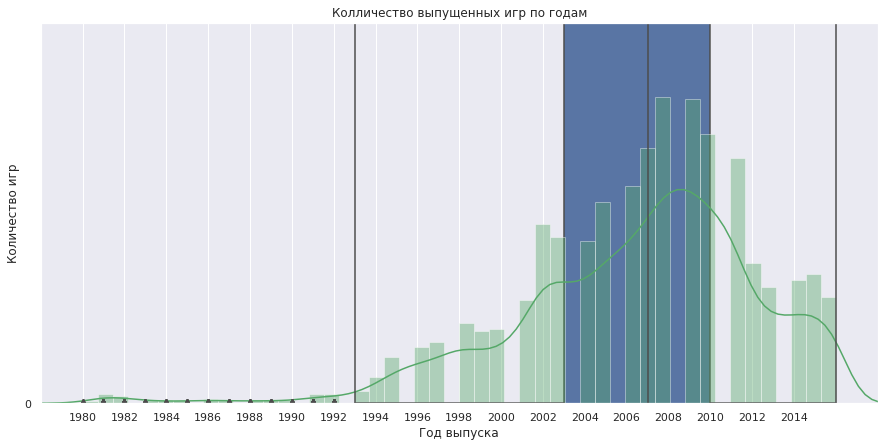

In [45]:
sns.set()
fig, ax = plt.subplots()
fig.set_size_inches(15, 7)

sns.distplot(games_with_year.year_of_release, color='g', ax=ax)
sns.boxplot(data=games_with_year.year_of_release, orient='h', ax=ax)

plt.title('Колличество выпущенных игр по годам')
ax.invert_yaxis()
ax.set(xlim=(1978, 2018))
ax.set(ylim=(0, 0.15))
ax.set_xticks(range(1980, 2016, 2))
ax.set_ylabel('Количество игр')
ax.set_xlabel('Год выпуска')
plt.show()

Видно, что основная масса игр была выпущена в период с 2003 по 2010. До 1993 было выпущенно очень мало игр, можем считать эти данные выбросами.

**Посмотрим, как менялись продажи по платформам. Выберим платформы с наибольшими суммарными продажами и построим распределение по годам. Посмотрим за какой характерный срок появляются новые и исчезают старые платформы?**

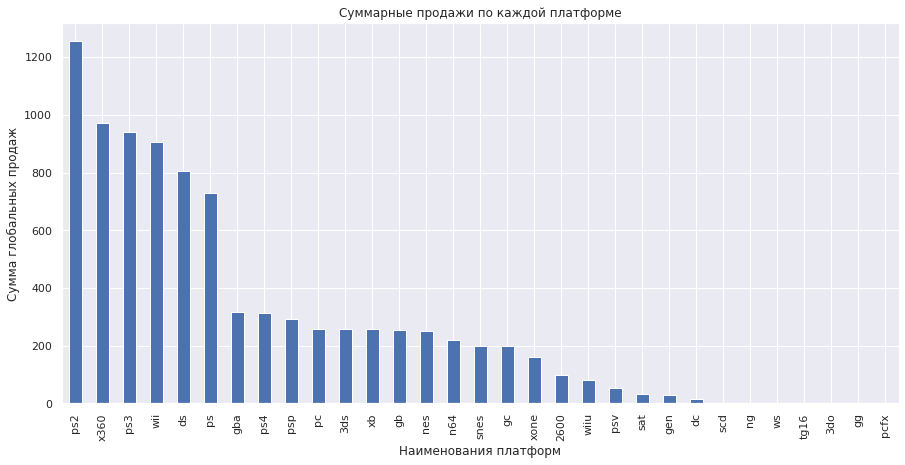

In [46]:
(games
     .pivot_table(index='platform', values='total_sales', aggfunc='sum')
     .sort_values('total_sales', ascending=False)
     .plot(kind='bar', y='total_sales', figsize=(15, 7), legend=False)
     .set(xlabel='Наименования платформ', ylabel='Сумма глобальных продаж')
)
plt.title('Суммарные продажи по каждой платформе')
plt.show()

Больше всего продаж у первых 6-ти платформ

In [47]:
top6 = (games
     .pivot_table(index='platform', values='total_sales', aggfunc='sum')
     .sort_values('total_sales', ascending=False)
     .head(6)
       )
top6

,total_sales
platform,
ps2,1255.77
x360,971.42
ps3,939.65
wii,907.51
ds,806.12
ps,730.86


In [48]:
def yearly_total_sales_by_platform(name, data):
    return (data
            .query("platform == @name")
            .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
            .sort_values('year_of_release', ascending=False))

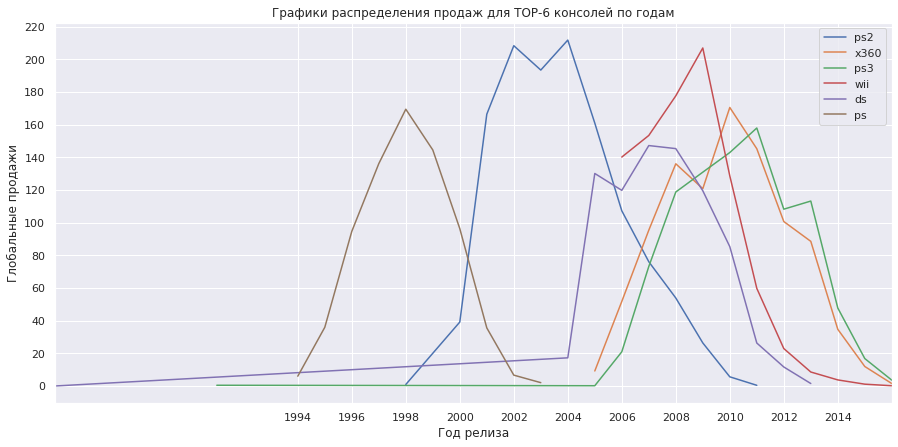

In [49]:
for platform in list(top6.index):
    yearly_total_sales_by_platform(platform, games)['total_sales'].plot(figsize=(15, 7), label=platform)
    plt.xlabel("Год релиза")
    plt.ylabel("Глобальные продажи")
    plt.xticks(range(1994, 2016, 2))
    plt.yticks(range(0, 240, 20))
    plt.legend()
plt.title('Графики распределения продаж для TOP-6 консолей по годам')
plt.show()

In [50]:
platform_lifespan = []
for platform in list(top6.index):
    lifespan = (yearly_total_sales_by_platform(platform, games).query('total_sales > 1')).index.max() - (yearly_total_sales_by_platform(platform, games).query('total_sales > 1')).index.min()
    platform_lifespan.append(lifespan)
print('Средняя продолжительность жизни платформ {:.0f} лет'.format(round(statistics.mean(platform_lifespan))))

Средняя продолжительность жизни платформ 10 лет


In [51]:
for platform in ['ds', 'ps3']:
    print(platform, yearly_total_sales_by_platform(platform, games))

ds                  total_sales
year_of_release             
2013                    1.54
2012                   11.67
2011                   26.33
2010                   85.35
2009                  119.56
2008                  145.36
2007                  147.23
2006                  119.81
2005                  130.14
2004                   17.27
1985                    0.02
ps3                  total_sales
year_of_release             
2016                    3.60
2015                   16.82
2014                   47.76
2013                  113.25
2012                  108.28
2011                  157.98
2010                  142.96
2009                  130.93
2008                  118.79
2007                   73.19
2006                   20.96
2005                    0.19
1991                    0.48


In [52]:
games.query('year_of_release == 1985 and platform == "ds"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,strongest tokyo university shogi ds,ds,1985,action,0.0,0.0,0.02,0.0,NaN,NaN,wo,0.02


In [53]:
games.query('(year_of_release == 1991 or year_of_release == 2005) and platform == "ps3"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
4127,sonic the hedgehog,ps3,1991,platform,0.0,0.48,0.00,0.00,43,4.1,e10+,0.48
7584,wrc: fia world rally championship,ps3,2005,racing,0.0,0.14,0.01,0.04,68,4.5,wo,0.19


Nintendo DS вышла в конце 2004 года, поэтому с игрой strongest tokyo university shogi ds какая-то ошибка, в 1985 году не могло выйти игры на ds.

Ps3 вышла в конце 2006, аналогично в 1991 году не могло быть игры на Ps3.


По графику можно заметить, что каждая новая платформа появляется, достигает пика своей популярности примерно за 5 лет и еще через 5 лет платформа уже никому не нужна. 

Можно сделать вывод, что для прогнозирования успеха той или иной игры нужно использовать данные за последние 4 лет или меньше, все что ранее не поможет в прогнозе, т.к. некоторые платформы могут уже не существовать, по последним 4 годам можно определить на какой стадии своего развития находится платформа. Выделим интересующую нас часть датасета в переменную actual_games.

In [54]:
actual_games = games[
    (games['year_of_release'] >= 2012) & 
    (games['year_of_release'] <= 2016)]
actual_games.shape[0]

2899

**Определим какие платформы лидируют по продажам, растут и падают? Выберим несколько потенциально прибыльных платформ**

Рассмотрим данные за последние 4 года

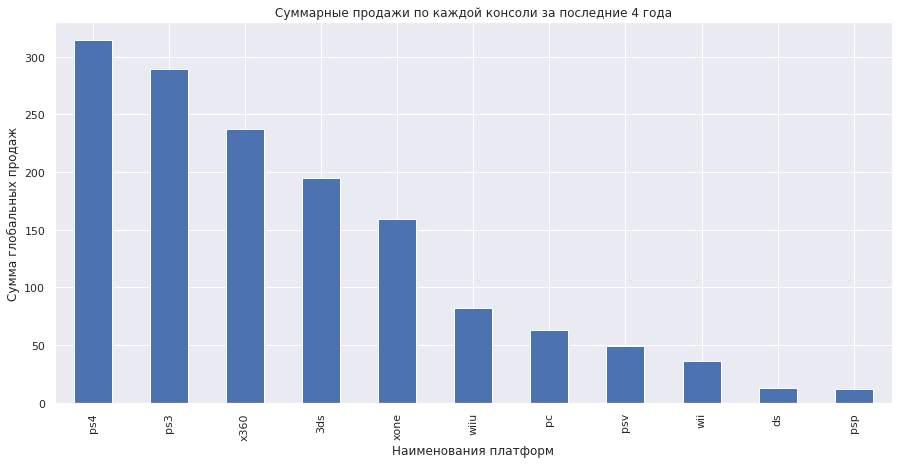

In [55]:
total_sales_pivit = actual_games\
     .pivot_table(index='platform', values='total_sales', aggfunc='sum')\
     .sort_values('total_sales', ascending=False)
total_sales_pivit\
    .plot(kind='bar', y='total_sales', figsize=(15, 7), legend=False)\
    .set(xlabel='Наименования платформ', 
          ylabel='Сумма глобальных продаж', 
          yticks=range(0, 350, 50))
plt.title('Суммарные продажи по каждой консоли за последние 4 года')
plt.show()

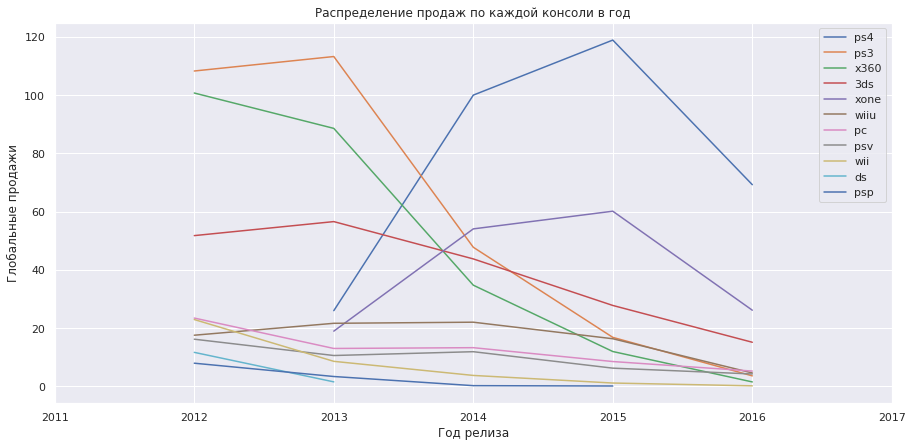

In [56]:
platforms = list(total_sales_pivit.index)
for platform in list(platforms):
    yearly_total_sales_by_platform(platform, actual_games)['total_sales'].plot(figsize=(15, 7), label=platform)
    plt.xlabel("Год релиза")
    plt.ylabel("Глобальные продажи")
    plt.xticks(range(2011, 2018))
    plt.yticks(range(0, 140, 20))
    plt.legend()
plt.title('Распределение продаж по каждой консоли в год')
plt.show()

По гистограмме видно, что по продажам за последние 4 года лидируют ps4, ps3, x360, 3ds, xone. 

Но при взгляде на график мы можем заметить, что у ps3, x360, wii в 2015 году продажы составляли менее 20 млн копий в год, эти консоли находятся в конце своего жизненного цикла. ds умерла в 2013, psp - 2015. 

В то же время мы можем заметить появившиеся в 2013 году ps4 и xone, которые буквально уничтожили все остальные платформы. Эти консоли в 2017 еще не дойдут до пика своей популярности и будут актуальны еще примерно до 2023 года, если верить историческим данным.

**Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам и опишим результат**

В среднем глобальные продажи в год для платформ: 
	ps4 равны: 	78.54
	ps3 равны: 	57.94
	x360 равны: 	47.50
	3ds равны: 	39.00
	xone равны: 	39.83
	wiiu равны: 	16.44
	pc равны: 	12.70
	psv равны: 	9.84
	wii равны: 	7.32
	ds равны: 	6.60


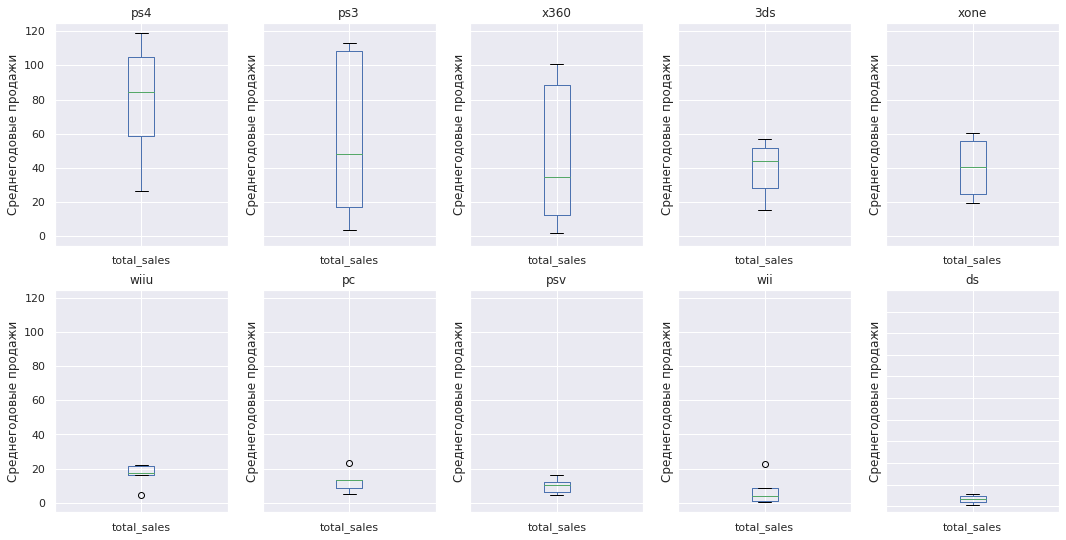

In [57]:
platforms = list(total_sales_pivit.index)[:10]

rows = 2
columns = 5
fig, axs = plt.subplots(rows, columns, sharey=True, figsize=(18, 9))

# построение графиков продаж по каждой платформе
print('В среднем глобальные продажи в год для платформ: ')
for num, platform in enumerate(platforms):
    df = yearly_total_sales_by_platform(platform, actual_games)
    print(f"\t{platform} равны: \t{df['total_sales'].mean():.2f}")
    df.boxplot('total_sales', ax=axs[num // columns, num % columns])
    axs[num // columns, num % columns].set_title(platform)
    axs[num // columns, num % columns].set_ylabel('Среднегодовые продажи')

plt.yticks(range(0, 201, 20))
# plt.subplots_adjust(left=0.1)
plt.show()

ps4 по продажам за последние 4 года находится на 1 месте нашего ТОПа, а xone на 5 месте. xone выглядят довольно сдержано(без выбросов вверх). И это всего спустя 3 года. Это очень хорошие результаты. 

Попробуем объяснить снижение популярности остальных консолей:
 * ps3, x360 - планомерно устарели
 * такие консоли как ds, psv, wiiu, 3ds обладали ограниченной функциональностью и не большим экраном. Они просто ушли в небытие с приходом современных смартфонов и относительно дешевых телевизоров
 * железо для игрового pc позволить себе может не каждый
 
 Кроме того, наличие всего 2-х основных консолей сильно упрощает жизнь разработчикам. 

**Посмотрим, как влияют на продажи внутри пары популярных платформ отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.**

In [58]:
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [59]:
sales_cols = [col for col in actual_games.columns if 'sales' in col]
cols = ['user_score', 'critic_score'] + sales_cols
clear_games = actual_games[(actual_games['user_score'].notnull()) & (actual_games['critic_score'].notnull())]
ps4 = clear_games.query("platform == 'ps4'")
xone = clear_games.query("platform == 'xone'")

In [60]:
print('PS4')
display_side_by_side(ps4[cols].corr()[['user_score', 'critic_score']], 
                     yearly_total_sales_by_platform('ps4', ps4))
print('XOne')
display_side_by_side(xone[cols].corr()[['user_score', 'critic_score']],
                     yearly_total_sales_by_platform('xone', xone))

PS4


user_score 
 critic_score 
 
 
 
 
 user_score 
 1.000000 
 0.557654 
 
 
 critic_score 
 0.557654 
 1.000000 
 
 
 na_sales 
 -0.022577 
 0.414241 
 
 
 eu_sales 
 -0.050671 
 0.346044 
 
 
 jp_sales 
 0.174512 
 0.322057 
 
 
 other_sales 
 -0.037332 
 0.408465 
 
 
 total_sales 
 -0.033625 
 0.405895 
 
 
 
 
 
 
 total_sales 
 
 
 year_of_release 
 
 
 
 
 
 2016 
 57.35 
 
 
 2015 
 80.90 
 
 
 2014 
 80.95 
 
 
 2013 
 25.07

XOne


user_score 
 critic_score 
 
 
 
 
 user_score 
 1.000000 
 0.472462 
 
 
 critic_score 
 0.472462 
 1.000000 
 
 
 na_sales 
 -0.094047 
 0.381859 
 
 
 eu_sales 
 -0.075822 
 0.373454 
 
 
 jp_sales 
 0.071915 
 0.199978 
 
 
 other_sales 
 -0.095963 
 0.404996 
 
 
 total_sales 
 -0.094003 
 0.410422 
 
 
 
 
 
 
 total_sales 
 
 
 year_of_release 
 
 
 
 
 
 2016 
 23.70 
 
 
 2015 
 44.58 
 
 
 2014 
 47.01 
 
 
 2013 
 14.92

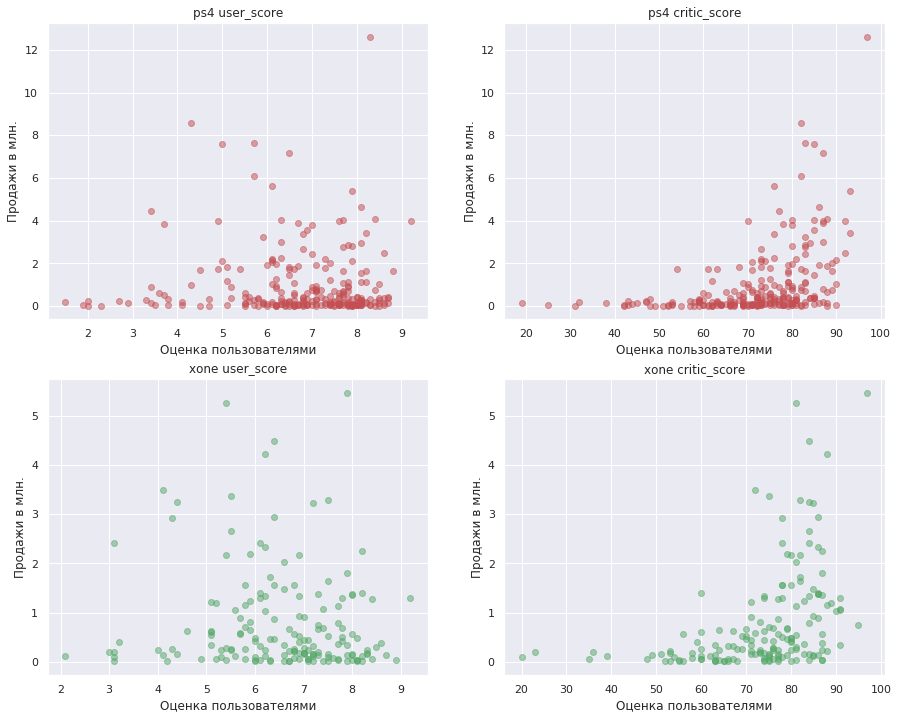

In [61]:
fig, axs = plt.subplots(2, 2, figsize=(15, 12))

axs[0, 0].scatter(ps4['user_score'], ps4['total_sales'], color='r', alpha=0.5)
axs[0, 0].set_title('ps4 user_score')
axs[0, 0].set_xlabel('Оценка пользователями')
axs[0, 0].set_ylabel('Продажи в млн.')

axs[0, 1].scatter(ps4['critic_score'], ps4['total_sales'], color='r', alpha=0.5)
axs[0, 1].set_title('ps4 critic_score')
axs[0, 1].set_xlabel('Оценка пользователями')
axs[0, 1].set_ylabel('Продажи в млн.')

axs[1, 0].scatter(xone['user_score'], xone['total_sales'], color='g', alpha=0.5)
axs[1, 0].set_title('xone user_score')
axs[1, 0].set_xlabel('Оценка пользователями')
axs[1, 0].set_ylabel('Продажи в млн.')

axs[1, 1].scatter(xone['critic_score'], xone['total_sales'], color='g', alpha=0.5)
axs[1, 1].set_title('xone critic_score')
axs[1, 1].set_xlabel('Оценка пользователями')
axs[1, 1].set_ylabel('Продажи в млн.')

plt.show()

In [62]:
print(f'Среднее значение user_score для ps4 = {ps4["user_score"].mean():.2f}')
print(f'Среднее значение user_score для xone = {xone["user_score"].mean():.2f}\n')

print(f'Медианное значение user_score для ps4 = {ps4["user_score"].median():.2f}')
print(f'Медианное значение user_score для xone = {xone["user_score"].median():.2f}\n')

print(f'Среднее значение critic_score для ps4 = {ps4["critic_score"].mean():.2f}')
print(f'Среднее значение critic_score для xone = {xone["critic_score"].mean():.2f}\n')

print(f'Среднее значение total_sales для ps4 = {ps4["total_sales"].mean():.2f}')
print(f'Среднее значение total_sales для xone = {xone["total_sales"].mean():.2f}')

Среднее значение user_score для ps4 = 6.75
Среднее значение user_score для xone = 6.54

Медианное значение user_score для ps4 = 7.00
Медианное значение user_score для xone = 6.80

Среднее значение critic_score для ps4 = 72.13
Среднее значение critic_score для xone = 73.62

Среднее значение total_sales для ps4 = 0.98
Среднее значение total_sales для xone = 0.79


Из вышеприведенных графиков и таблиц мы можем сделать несколько выводов:
* Корреляция между продажами и оценкой критиков очень высока ~0.4. Это можно объяснить тем, что игры, которые получились действительно хорошо, были тепло встречены не только критиками, но и покупателями. Можно сказать, что успешность игры сильно зависит от отзывов критиков: чем выше отзыв, тем выше продажи.
* В то же время оценки пользователей имеют очень низкую корреляцию с продажами ~0.03. Это для меня остается загадкой. Есть предположение, что просто очень малое количество пользователей оценивает игры, большинство просто играет. Зависимости между оценками пользователей и продажами нет.
* Но в Японии оценка пользователей имеет немного большее значение ~0.17. Видемо тут игроки более ответственно относятся к играм.

**Исследуем общее распределение игр по жанрам. Посмотрим, что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?**

In [63]:
sales_cols = [col for col in actual_games.columns if 'sales' in col]
cols = ['genre'] + sales_cols

In [64]:
actual_games[cols].groupby('genre').sum().sort_values('total_sales', ascending=False)

,na_sales,eu_sales,jp_sales,other_sales,total_sales
genre,,,,,
action,180.15,161.70,52.80,51.76,446.41
shooter,144.79,113.47,9.23,37.26,304.75
role-playing,64.00,48.53,65.44,14.83,192.80
sports,81.53,69.09,8.01,22.44,181.07
misc,38.19,26.32,13.10,7.67,85.28
platform,25.38,21.41,8.63,5.58,61.00
racing,17.22,27.29,2.50,6.49,53.50
fighting,19.79,10.79,9.44,4.47,44.49
simulation,7.97,14.55,10.41,2.19,35.12


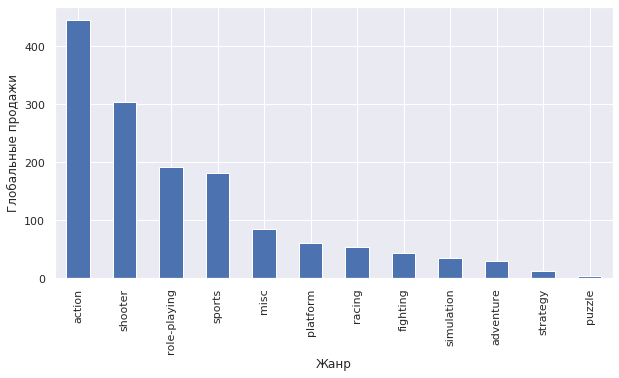

In [65]:
(actual_games[cols].groupby('genre').sum().sort_values('total_sales', ascending=False)
     .plot(kind='bar', y='total_sales', figsize=(10, 5), legend=False)
     .set(xlabel='Жанр', ylabel='Глобальные продажи'))

plt.show()

Жанры  можно разделить на прибыльные и не очень прибыльные. К первым можно отнести action, shooter, role-playing, sport, misc.

Остальные к не очень прибыльным.

### Вывод

В ходе выполнения этого шага мы:
* посмотрели на количество игр выпускающихся каждый год
    * до 1993 года игр было выпущенно очень мало, так что использовать эти данные нет смысла
* проанализировали уровни продаж в разные года для платформ
    * ТОП-6 консолей по продажам за все время: ps2, x360, ps3, wii, ds, ps
* выяснили, что жизненный цикл консоли составляет примерно 10 лет
* убедились, что для прогнозирования успешности игры достаточно данных за последние 10 лет
* выявили фаворитов и аутсайдеров в гонке консолей на 2016 год
    * на 2016 год XOne и PS4 являются фаворитами, уничтожающими другие консоли
* выяснили, что оценка критиков очень влияет на продажи игры, а оценка пользователей - нет
* выделили прибыльные и не очень жанры.
    * самые прибыльные жанры: action, shooter, sport, misc, role-playing

## Шаг 4. Составим портрет пользователя каждого региона.

**Определим для пользователя каждого региона топ-5 платформ и опишим различия в долях продаж.**

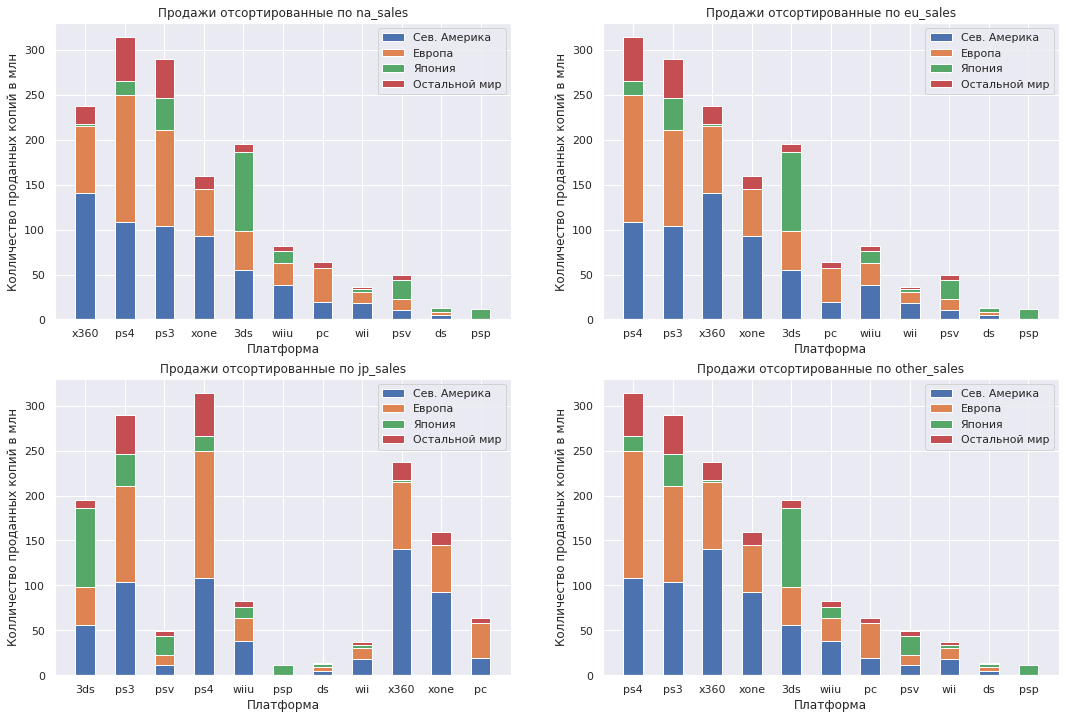

In [66]:
sales_cols = [col for col in actual_games.columns if 'sales' in col]
cols = ['platform'] + sales_cols
columns = 2

groupped_games = actual_games[cols].groupby('platform').sum()
fig, axs = plt.subplots(2, 2, figsize=(18, 12))
width = 0.5

for i, col in enumerate(['na_sales', 'eu_sales', 'jp_sales', 'other_sales']):
    row = i // columns
    column = i % columns
    groupped_games = groupped_games.sort_values(col, ascending=False)
    
    axs[row, column].bar(groupped_games.index, groupped_games['na_sales'], width, label="Сев. Америка")
    axs[row, column].bar(groupped_games.index, groupped_games['eu_sales'], width, label="Европа",
                  bottom=groupped_games['na_sales'])
    axs[row, column].bar(groupped_games.index, groupped_games['jp_sales'], width, label="Япония",
                  bottom=groupped_games['eu_sales'] + groupped_games['na_sales'])
    axs[row, column].bar(groupped_games.index, groupped_games['other_sales'], width, label="Остальной мир",
                  bottom=groupped_games['jp_sales'] + groupped_games['eu_sales'] + groupped_games['na_sales'])
    axs[row, column].set_title(f'Продажи отсортированные по {col}')
    axs[row, column].legend()
    axs[row, column].set_yticks(range(0, 350, 50))
    axs[row, column].set_ylabel('Колличество проданных копий в млн')
    axs[row, column].set_xlabel('Платформа')
    
plt.show()

Для наглядности, добавим графики для каждого региона в отдельности.

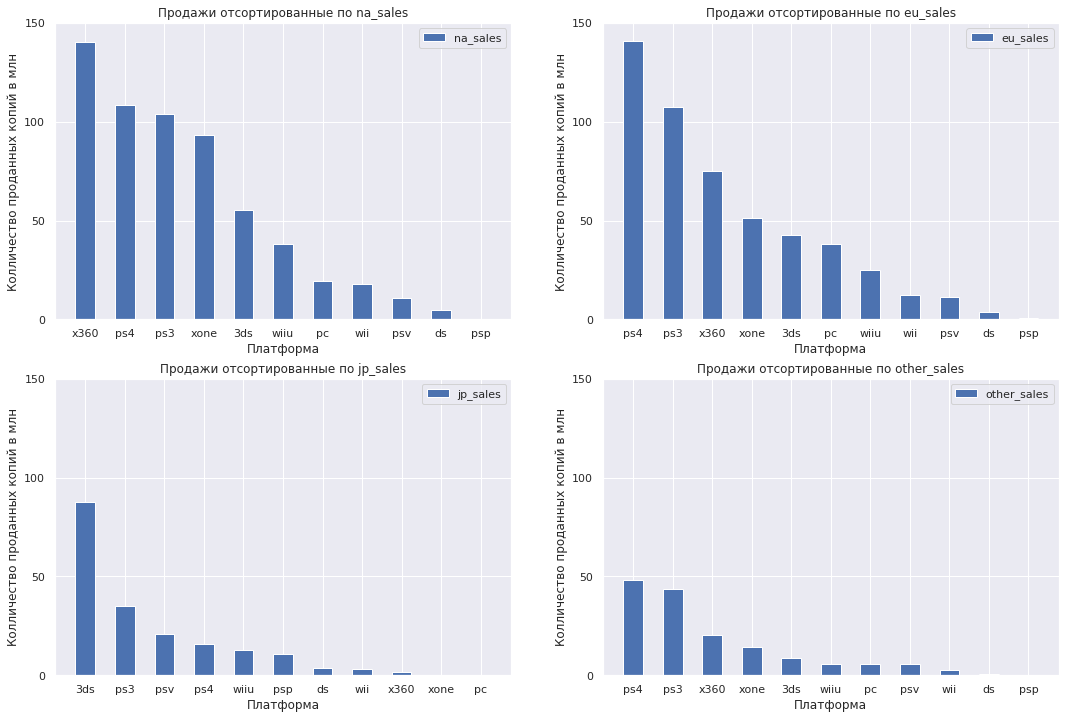

In [67]:
sales_cols = [col for col in actual_games.columns if 'sales' in col]
cols = ['platform'] + sales_cols
columns = 2

groupped_games = actual_games[cols].groupby('platform').sum()
fig, axs = plt.subplots(2, 2, figsize=(18, 12))
width = 0.5

for i, col in enumerate(['na_sales', 'eu_sales', 'jp_sales', 'other_sales']):
    row = i // columns
    column = i % columns
    groupped_games = groupped_games.sort_values(col, ascending=False)
    axs[row, column].bar(groupped_games.index, groupped_games[col], width, label=col)
    axs[row, column].set_title(f'Продажи отсортированные по {col}')
    axs[row, column].legend()
    axs[row, column].set_yticks(range(0, 151, 50))
    axs[row, column].set_ylabel('Колличество проданных копий в млн')
    axs[row, column].set_xlabel('Платформа')
    
plt.show()

Тор 5 платформ для каждого региона:
 * для Северной Америки это: x360, ps4, ps3, xone, 3ds, 
 * для Европы это: ps4, ps3, x360, xone, 3ds
 * для Японии это: 3ds, ps3, psv, ps4, wiiu
 * для остального мира: ps4, ps3, x360, xone, 3ds
 
Эти 4 графика позволяют посмотреть на продажи по всем платформам во всех регионах.
Для удобства определения важности платформы для региона, данные были отсортированы. Можно заметить, что 3ds попадает в топ5 платформ в основном благодаря японцам.

**Определим для пользователя каждого региона топ-5 жанров.**

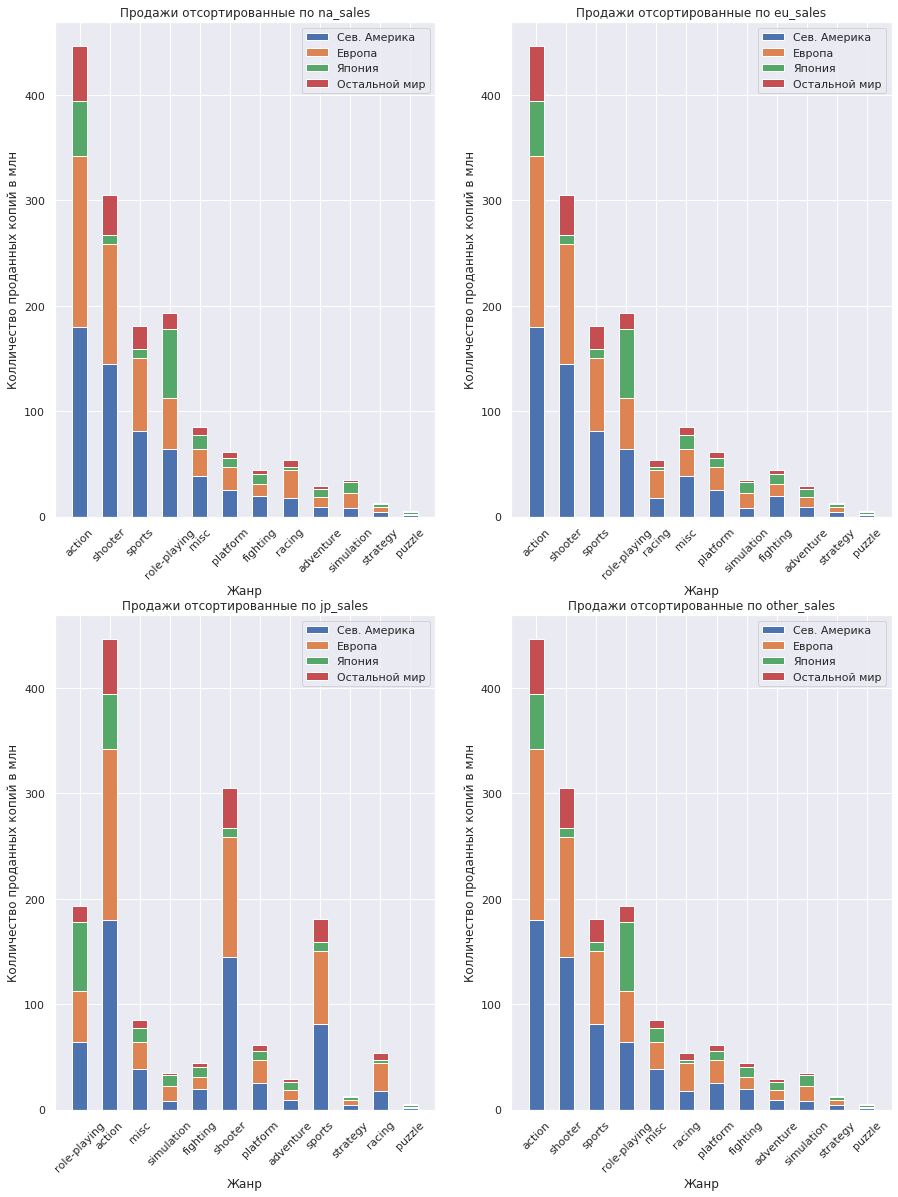

In [68]:
sales_cols = [col for col in actual_games.columns if 'sales' in col]
cols = ['genre'] + sales_cols


groupped_games = actual_games[cols].groupby('genre').sum()
fig, axs = plt.subplots(2, 2, figsize=(15, 20))
width = 0.5

for i, col in enumerate(['na_sales', 'eu_sales', 'jp_sales', 'other_sales']):
    row = i // columns
    column = i % columns
    groupped_games = groupped_games.sort_values(col, ascending=False)
    
    axs[row, column].bar(groupped_games.index, groupped_games['na_sales'], width, label="Сев. Америка")
    axs[row, column].bar(groupped_games.index, groupped_games['eu_sales'], width, label="Европа",
                  bottom=groupped_games['na_sales'])
    axs[row, column].bar(groupped_games.index, groupped_games['jp_sales'], width, label="Япония",
                  bottom=groupped_games['eu_sales'] + groupped_games['na_sales'])
    axs[row, column].bar(groupped_games.index, groupped_games['other_sales'], width, label="Остальной мир",
                  bottom=groupped_games['jp_sales'] + groupped_games['eu_sales'] + groupped_games['na_sales'])
    axs[row, column].set_title(f'Продажи отсортированные по {col}')
    axs[row, column].legend()
    axs[row, column].set_yticks(range(0, 450, 100))    
    axs[row, column].set_xticklabels(groupped_games.index, rotation=45)
    axs[row, column].set_ylabel('Колличество проданных копий в млн')
    axs[row, column].set_xlabel('Жанр')
plt.show()

Для наглядности, добавим графики для каждого региона в отдельности

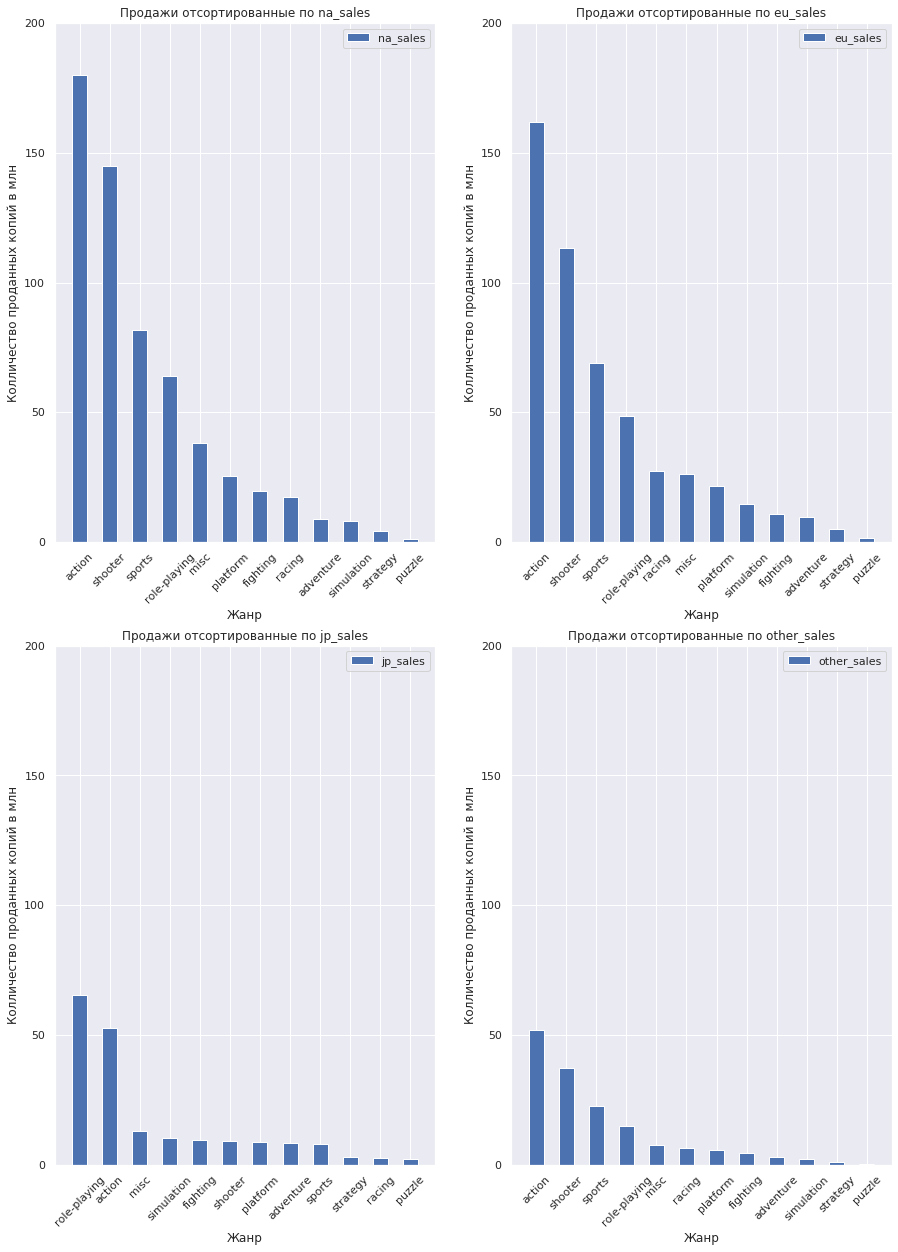

In [69]:
sales_cols = [col for col in actual_games.columns if 'sales' in col]
cols = ['genre'] + sales_cols


groupped_games = actual_games[cols].groupby('genre').sum()
fig, axs = plt.subplots(2, 2, figsize=(15, 21))
width = 0.5

for i, col in enumerate(['na_sales', 'eu_sales', 'jp_sales', 'other_sales']):
    row = i // columns
    column = i % columns
    groupped_games = groupped_games.sort_values(col, ascending=False)
    
    axs[row, column].bar(groupped_games.index, groupped_games[col], width, label=col)
    axs[row, column].set_title(f'Продажи отсортированные по {col}')
    axs[row, column].legend()
    axs[row, column].set_yticks(range(0, 201, 50))    
    axs[row, column].set_xticklabels(groupped_games.index, rotation=45)
    axs[row, column].set_ylabel('Колличество проданных копий в млн')
    axs[row, column].set_xlabel('Жанр')
plt.show()

Для каждого региона мы можем назвать разные высокодоходные жанры:
 * для Северной Америки это: action, shooter, sport, role-playing, misc
 * для Европы это: action, shooter, sport, role-playing, racing
 * для Японии это: role-playing, action, misc, simulation, fighting
 * для остального мира: action, shooter, sport, role-playing, misc
 
 Бары в этих графиках отсортированы по продажам в одном из региоров. Можно заметить, что график для Японии опять отличается. Это связано с их специфическими вкусами в играх.

**Выясним, влияет ли рейтиинг ESRB на продажи в отдельном регионе.**

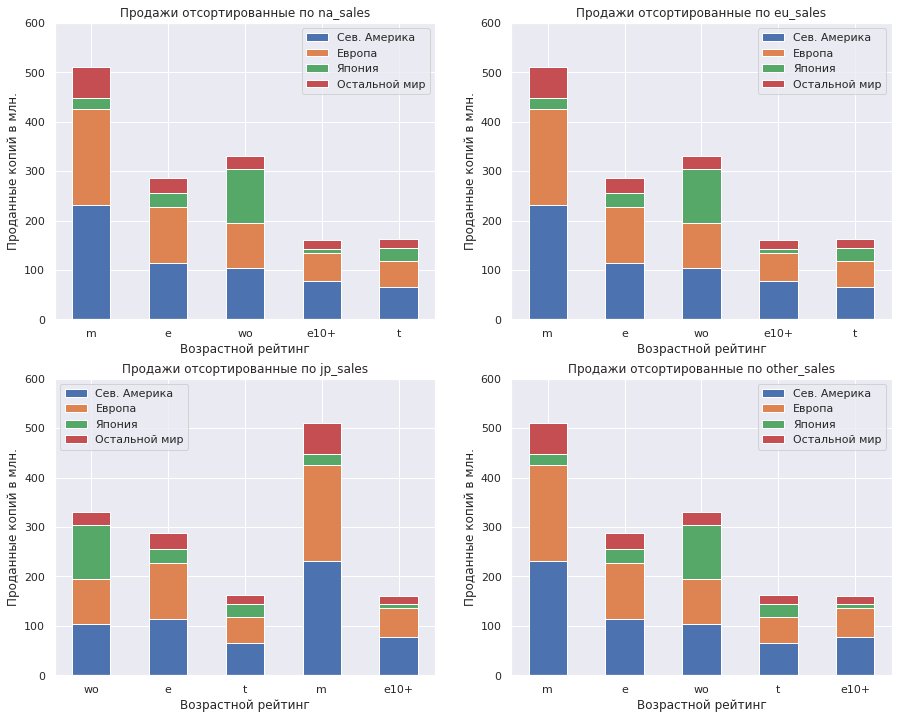

In [70]:
sales_cols = [col for col in actual_games.columns if 'sales' in col]
cols = ['rating'] + sales_cols


groupped_games = actual_games[cols].groupby('rating').sum()
fig, axs = plt.subplots(2, 2, figsize=(15, 12))
width = 0.5

for i, col in enumerate(['na_sales', 'eu_sales', 'jp_sales', 'other_sales']):
    row = i // columns
    column = i % columns
    groupped_games = groupped_games.sort_values(col, ascending=False)
    
    axs[row, column].bar(groupped_games.index, groupped_games['na_sales'], width, label="Сев. Америка")
    axs[row, column].bar(groupped_games.index, groupped_games['eu_sales'], width, label="Европа",
                  bottom=groupped_games['na_sales'])
    axs[row, column].bar(groupped_games.index, groupped_games['jp_sales'], width, label="Япония",
                  bottom=groupped_games['eu_sales'] + groupped_games['na_sales'])
    axs[row, column].bar(groupped_games.index, groupped_games['other_sales'], width, label="Остальной мир",
                  bottom=groupped_games['jp_sales'] + groupped_games['eu_sales'] + groupped_games['na_sales'])
    axs[row, column].set_title(f'Продажи отсортированные по {col}')
    axs[row, column].legend()
    axs[row, column].set_yticks(range(0, 601, 100))    
    axs[row, column].set_ylabel('Проданные копий в млн.')
    axs[row, column].set_xlabel('Возрастной рейтинг')
    
plt.show()

Для наглядности, добавим графики для каждого региона в отдельности.

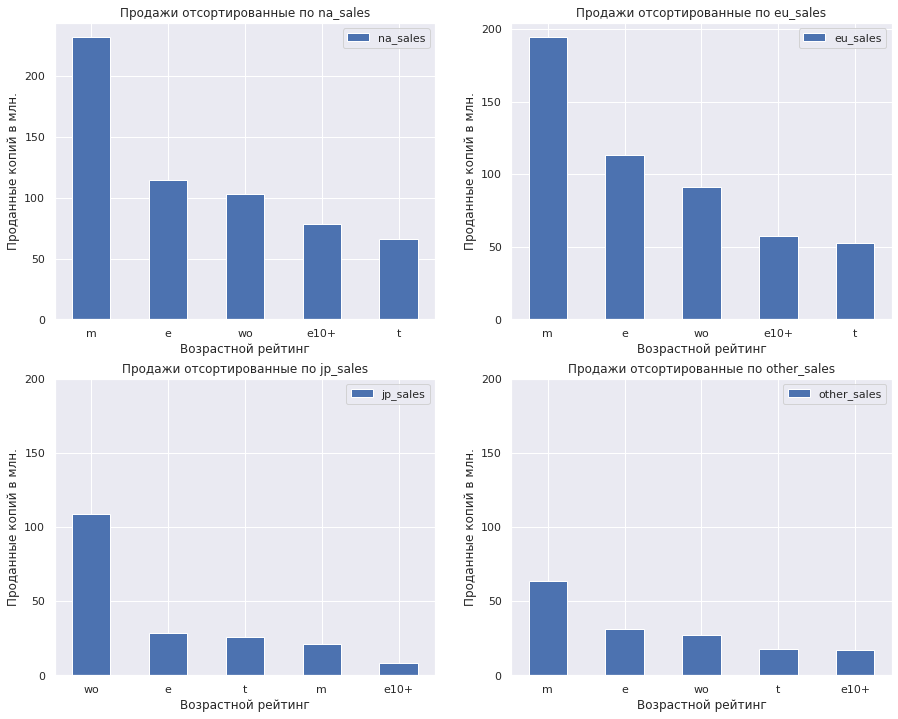

In [71]:
sales_cols = [col for col in actual_games.columns if 'sales' in col]
cols = ['rating'] + sales_cols


groupped_games = actual_games[cols].groupby('rating').sum()
fig, axs = plt.subplots(2, 2, figsize=(15, 12))
width = 0.5

for i, col in enumerate(['na_sales', 'eu_sales', 'jp_sales', 'other_sales']):
    row = i // columns
    column = i % columns
    groupped_games = groupped_games.sort_values(col, ascending=False)
    
    axs[row, column].bar(groupped_games.index, groupped_games[col], width, label=col)
    axs[row, column].set_title(f'Продажи отсортированные по {col}')
    axs[row, column].legend()
    axs[row, column].set_yticks(range(0, 201, 50))    
    axs[row, column].set_ylabel('Проданные копий в млн.')
    axs[row, column].set_xlabel('Возрастной рейтинг')
    
plt.show()

По регионам почти нет отличий в продажах по рейтингу. Только в Японии игры с рейтингом T немного популярнее, чем M. Довольно большое количество игр не имеет рейтинга, но распределение их по странам примерно одинаковое. В ходе анализа данных мы не нашли причины отсутствия этих значний.

### Вывод

В ходе выполнения этого шага мы выяснили, что у Японцев немного специфические вкусы относительно игр. При выпуске игры нужно делать упор на тот жанр, который востребован в стране, на которую ориентированна игра.

## Шаг 5. Проверим гипотезы.

Нулевая гипотеза всегда формулируется так, чтобы использовать знак равенства.

**Нулевая гипотеза 1: средние пользовательские рейтинги платформ Xbox One и PC равны.**


**Альтернативная гипотеза 1: средние пользовательские рейтинги платформ Xbox One и PC не равны.**

Чтобы проверить гипотезу о равенстве среднего двух совокупностей по взятым из них выборкам, применим метод scipy.stats.ttest_ind (array1, array2)

In [72]:
ALPHA = .025 #alpha - критический уровень статистической значимости, 
#если p-value окажется меньше него - отвергнем гипотезу

def check_pvalue(pvalue):
    if pvalue < ALPHA:
        print("Отвергаем нулевую гипотезу")
    else:
        print("Не отвергаем нулевую гипотезу")

array_xbox = actual_games.query('platform == "xone" and user_score.notnull()')['user_score']
array_pc = actual_games.query('platform == "pc" and user_score.notnull()')['user_score']

In [73]:
print('Дисперсия пользовательских оценок для XOne =', round(array_xbox.var(),  2))
print('Дисперсия пользовательских оценок для PC =', round(array_pc.var(),  2))

Дисперсия пользовательских оценок для XOne = 1.91
Дисперсия пользовательских оценок для PC = 2.75


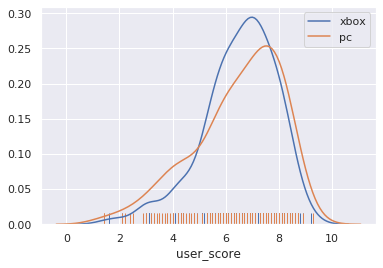

In [74]:
ax = sns.distplot(array_xbox, rug=True, hist=False, label='xbox')
sns.distplot(array_pc, rug=True, hist=False, label='pc', ax=ax);

Мы видим, что распределения оценок можно назвать нормальными. Значения дисперсий отличаются, поэтому при расчете установим equal_var=False.

In [75]:
results = st.ttest_ind(
    array_xbox, 
    array_pc,
    equal_var=False,
    nan_policy='omit')
print('p-значение:', results.pvalue)

check_pvalue(results.pvalue)

p-значение: 0.6206366351489678
Не отвергаем нулевую гипотезу


**Нулевая гипотеза 2: cредние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые.**


**Альтернативная гипотеза 2: cредние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.**



In [76]:
array_action = actual_games.query('genre == "action"')['user_score']
array_sports = actual_games.query('genre == "sports"')['user_score']

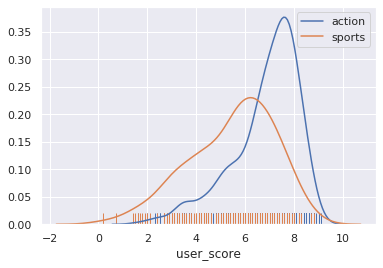

In [77]:
ax = sns.distplot(array_action, rug=True, hist=False, label='action')
sns.distplot(array_sports, rug=True, hist=False, label='sports', ax=ax);

In [78]:
print('Дисперсия пользовательских оценок для жанра Action =', round(array_action.var(),  2))
print('Дисперсия пользовательских оценок для жанра Sports =', round(array_sports.var(),  2))

Дисперсия пользовательских оценок для жанра Action = 1.88
Дисперсия пользовательских оценок для жанра Sports = 3.02


Значения дисперсий отличаются, поэтому при расчете установим equal_var=False.

In [79]:
results = st.ttest_ind(
    array_action, 
    array_sports,
    equal_var=False,
    nan_policy='omit')
print('p-значение:', results.pvalue)

check_pvalue(results.pvalue)

p-значение: 2.3372002395918124e-20
Отвергаем нулевую гипотезу


### Вывод

Было проверено 2 гипотезы:
 * средние пользовательские рейтинги платформ Xbox One и PC равны
     * Не отвергаем нулевую гипотезу
 * cредние пользовательские рейтинги жанров action и sports одинаковые
     * Отвергаем нулевую гипотезу

## Шаг 6. Общий вывод

В начале исследования были поставлены задачи: 
 * выявить определяющие успешность игры закономерности
 * отработать принцип работы с данными
    
В ходе исследования было выявлено, что для определения успешности игры необходимо взвешивать множество факторов:
 * Платформа, на которой выпускается игра, не должна быть старше 5 лет
     * На платформы старше 5 лет игры часто уже не выпускаются, т.к. необходимо более производительное оборудование
     * Так же мы заметили, что рынок портативных консолей постепенно умирает, т.е. их можно не учитывать при разработке игр
 * Жанр игры должен быть востребован в тех странах, на которые мы ориентированны
    * Для каждого региона мы можем назвать разные высокодоходные жанры:
         * для Северной Америки это: action, shooter, sport, role-playing, misc
         * для Европы это: action, shooter, sport, role-playing, racing
         * для Японии это: role-playing, action, misc, simulation, fighting
         * для остального мира: action, shooter, sport, role-playing, misc
 * Платформы  должны быть востребованны в этих странах
    * Тор 5 платформ для каждого региона:
         * для Северной Америки это: x360, ps4, ps3, xone, 3ds, 
         * для Европы это: ps4, ps3, x360, xone, 3ds
         * для Японии это: 3ds, ps3, psv, ps4, wiiu
         * для остального мира: ps4, ps3, x360, xone, 3ds
 * Отзывы критиков играют очень большую роль в продажах
     * Зависимость уровня продаж/успешности игры сильно зависит от отзывов критиков. Это может быть связано с тем, что критики честно оценивают игру и если она действительно хороша ставят ей высокую оценку, что толкает продажи вверх.
     * Отзывы пользователей при этом совершенно не важны, это странно, возможно у нашего магазина не удобно настроена функция получения feedback-а от пользователей.

Было множество пропущенных значений, которые мы никак не можем восстановить, это оценка пользоватлей, оценка критиков, а так же возростной рейтинг игр. Возможно это связано с ошибкой при выгрузке данных.

Производителям игр требуется тщательно исследовать рынок, на который они хотят выйти. Создание игр жанра action, для платформы XONE или PS4 для рынка Северной Америки, скорее всего, принесет хорошую прибыль.